# steps for exploratory data analysis are
1. univariate analysis
2. bivairate
3. handle missing values
4. outlier analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import collections

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Pregnancies'>

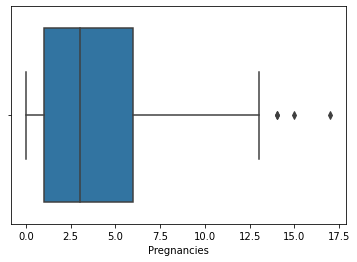

In [5]:
sns.boxplot(x = data['Pregnancies'])

In [14]:
collections.Counter(data['Pregnancies'])

Counter({6: 50,
         1: 135,
         8: 38,
         0: 111,
         5: 57,
         3: 75,
         10: 24,
         2: 103,
         4: 68,
         7: 45,
         9: 28,
         11: 11,
         13: 10,
         15: 1,
         17: 1,
         12: 9,
         14: 2})

In [6]:
collections.Counter(data['Pregnancies'] > 13)

Counter({False: 764, True: 4})

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

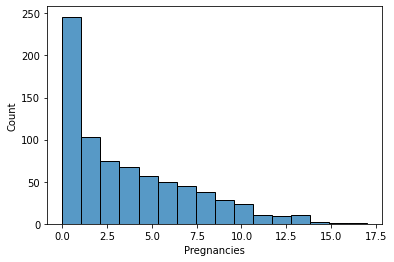

In [7]:
sns.histplot(data['Pregnancies'])

### from boxplot and histogram we can conclude that most of the data is concentrated within range 0 to 6. data above 10 or 12 can be considered as outliers and can safely remove them.

In [38]:
def remove_iqr_outliers(data, column, inplace = False):
    q1 = np.percentile(data[column], 25, interpolation = 'midpoint')
    q3 = np.percentile(data[column], 75, interpolation = 'midpoint')
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    higher_limit = q3 + 1.5 * iqr
    print(data[column].quantile(0.25))
    print(q1, q3)
    print(lower_limit, higher_limit)
    if inplace:
        data.drop(data[(data[column] < lower_limit) | (data[column] > higher_limit)].index, inplace = True)
        return
    data.drop(data[(data[column] < lower_limit) | (data[column] > higher_limit)].index)
    return data

data = remove_iqr_outliers(data, 'Pregnancies')

In [18]:
len(data)

764

### from histogram we conclude that the data is right skewed, hence we can transform it into log values

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

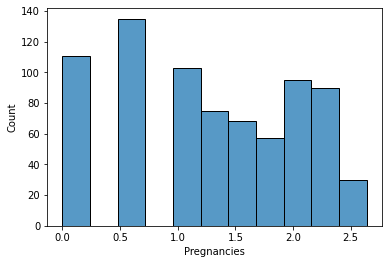

In [19]:
sns.histplot(np.log(data['Pregnancies'] + 1))

In [20]:
data['Pregnancies'] = np.log(data['Pregnancies'] + 1)

## let's do a analysis on glucose values

<AxesSubplot:xlabel='Glucose'>

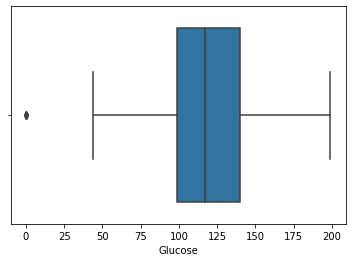

In [21]:
sns.boxplot(x = data['Glucose'])

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

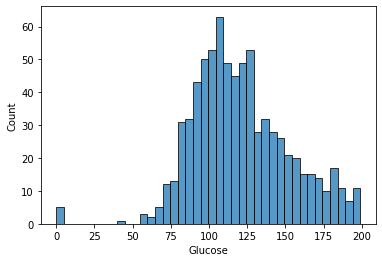

In [22]:
sns.histplot(data['Glucose'], bins = 40)

### most of the data is concentrated at 90 - 130, the overall distribution of data is normal.

In [23]:
data = remove_iqr_outliers(data, 'Glucose')

99.0
201.5 37.5
140.0 99.0


<AxesSubplot:xlabel='Glucose'>

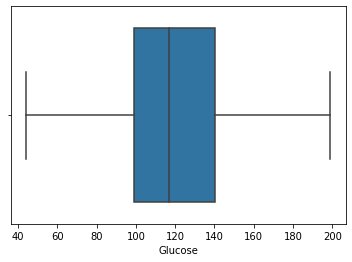

In [25]:
sns.boxplot(x = data['Glucose'])

In [26]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='BloodPressure'>

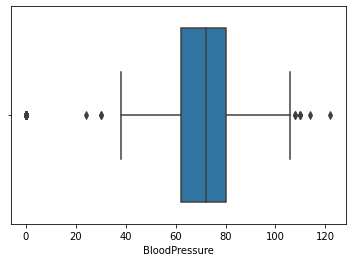

In [29]:
sns.boxplot(x = data['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

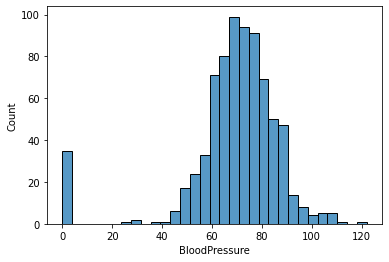

In [30]:
sns.histplot(data['BloodPressure'])

### here more data lies in range of 56 - 92

In [33]:
data = remove_iqr_outliers(data, 'BloodPressure')

64.0
104.0 40.0
80.0 64.0


In [32]:
len(data)

714

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

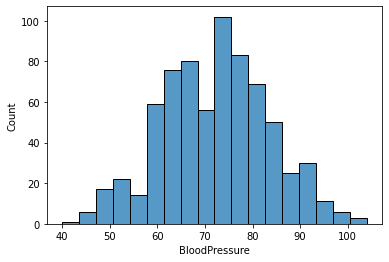

In [34]:
sns.histplot(x = data['BloodPressure'])

### after outlier removal, the graph is in normal form

In [37]:
# similarly for other fields as well, we'll do the same thing
for x in data.columns:
    if x not in ['Outcome', 'Age']:
        remove_iqr_outliers(data, x, inplace = True)

0.6931471805599453
3.8250546017983655 -1.1859972721831067
1.9459101490553132 0.6931471805599453
100.0
202.5 38.5
141.0 100.0
64.0
104.0 40.0
80.0 64.0
0.0
82.5 -49.5
33.0 0.0
0.0
330.0 -198.0
132.0 0.0
27.224999999999998
49.375 13.974999999999998
36.1 27.25
0.2455
1.19425 -0.32375000000000004
0.625 0.2455


<AxesSubplot:xlabel='BMI', ylabel='Count'>

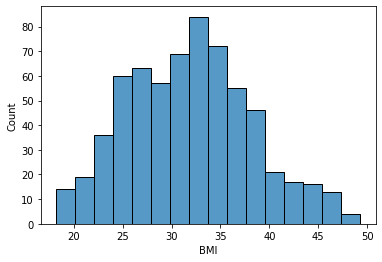

In [41]:
sns.histplot(x = data['BMI'])

# let's do bivariate analysis

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

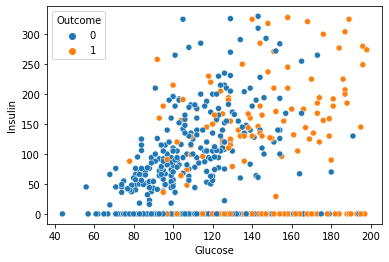

In [42]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = data, hue = 'Outcome')

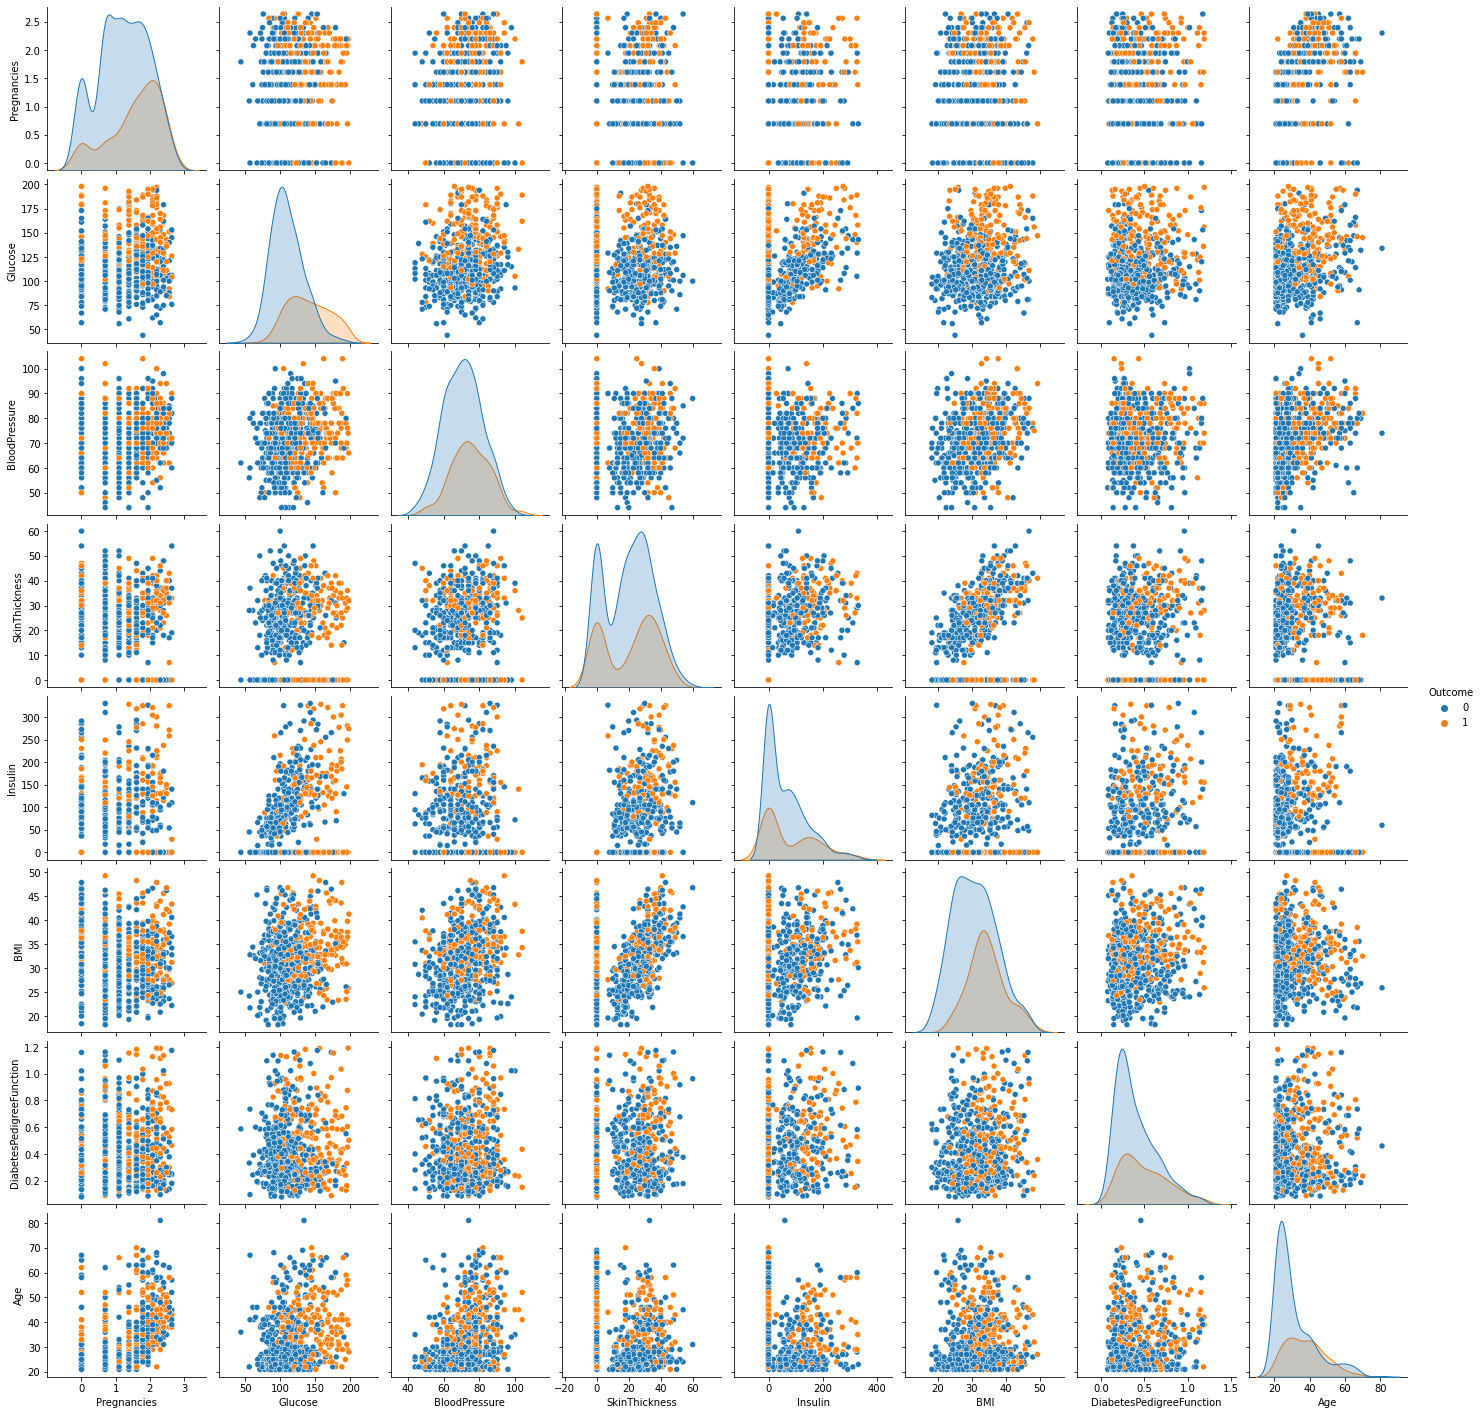

In [43]:
sns.pairplot(data = data, hue = 'Outcome')

### BloodPressure, bmi, skinThickness shows no correlation with other variables, so maybe we can try to train a model by dropping these column and compare it with other one where it is included

## Glucose, Pregnancies, Insulin, Age show good level of seperation of 2 groups

In [44]:
len(data)

646